In [22]:
import random
import math
import numpy as np
from random import gauss
import matplotlib.pyplot as plt

In [23]:
class Arm:
    def __init__(self, mean, variance):
        self.mean = mean
        self.variance = variance

    def get_reward(self):
        return np.random.normal(self.mean, self.variance, 1)

In [24]:
def generate_arms(n, means, variance):
    arms = []
    for i in range(n):
        arms.append(Arm(means[i], variance))
    return arms

In [25]:
def k_armed_bandit(mean_list, iterations, alpha, variance):
    n = len(mean_list)
    arms = generate_arms(n, mean_list, variance)
    utilities = np.array([0.0] * n)
    ns = np.array([0] * n)
    epsilon = 0.1
    epsilon_decay = 0.1
    reward_list = []
    reward_means = []
    for i in range(iterations):
        if random.random() < epsilon:
            action = random.randint(0, n - 1)
        else:
            action = np.argmax(utilities) 
        reward = arms[action].get_reward()
        if ns[action] == 0:
            utilities[action] = reward
        ns[action] += 1
        utilities[action] = alpha * utilities[action] + (reward - utilities[action])/ns[action]
        reward_list.append(reward)
        reward_means.append(np.sum(reward_list) / len(reward_list))
#     for i in range(len(utilities)):
#         print(utilities[i], ":", mean_list[i])
    print("Final reward average", np.sum(reward_list) / len(reward_list))
    plt.plot(reward_means)
    plt.title('E-greedy limited to 10%')
    plt.ylabel('Rewards')
    plt.show()
        


In [26]:
def egreedy_armed_bandit(mean_list, iterations, alpha, variance):
    n = len(mean_list)
    arms = generate_arms(n, mean_list, variance)
    utilities = np.array([0.0] * n)
    ns = np.array([0] * n)
    epsilon = 0.9997
    epsilon_decay = 0.4
    reward_list = []
    reward_means = []
    for i in range(iterations):
        if random.random() < epsilon:
            action = random.randint(0, n-1)
        else:
            action = np.argmax(utilities) 
        reward = arms[action].get_reward()
        if ns[action] == 0:
            utilities[action] = reward
        ns[action] += 1
        utilities[action] = alpha * utilities[action] + (reward - utilities[action])/ns[action]
        epsilon = max(1 - (0.001 * np.sum(i)), 0.00)
        reward_list.append(reward)
        reward_means.append(np.sum(reward_list) / len(reward_list))
#     for i in range(len(utilities)):
#         print(utilities[i], ":", mean_list[i])
    print("Final reward average", np.sum(reward_list) / len(reward_list))
    plt.plot(reward_means)
    plt.title('E-greedy')
    plt.ylabel('Rewards')
    plt.show()

In [27]:
def optimistic_greedy(mean_list, iterations, alpha, variance):
    n = len(mean_list)
    arms = generate_arms(n, mean_list, variance)
    utilities = np.array([10.0] * n)
    ns = np.array([0] * n)
    epsilon = 0
    reward_list = []
    reward_means = []
    for i in range(iterations):
        action = np.argmax(utilities)
        reward = arms[action].get_reward()
        if ns[action] == 0:
            utilities[action] = reward
        ns[action] += 1
        utilities[action] =  alpha * utilities[action] + (reward - utilities[action])/ns[action]
        reward_list.append(reward)
        reward_means.append(np.sum(reward_list) / len(reward_list))
#     for i in range(len(utilities)):
#         print(utilities[i], ":", mean_list[i])
    print("Final reward average", np.sum(reward_list)/ len(reward_list))
    plt.plot(reward_means)
    plt.title('Optimistic greedy')
    plt.ylabel('Rewards')
    plt.show()

In [28]:
def upper_confidence_bound(mean_list, iterations, alpha, variance):
    n = len(mean_list)
    arms = generate_arms(n, mean_list , variance)
    utilities = np.array([0.0] * n)
    ns = np.array([0.0] * n)
    epsilon = 0
    c = 2
    reward_list = []
    reward_means = []
    for i in range(iterations):
        ucb_utilities = np.copy(utilities)
        for j in range(len(ucb_utilities)):
            ucb_utilities[j] += c * math.sqrt(math.log(i + 1)/ns[j])
        action = np.argmax(ucb_utilities)
        reward = arms[action].get_reward()
        if ns[action] == 0:
            utilities[action] = reward
        ns[action] += 1
        utilities[action] =  alpha * utilities[action] + (reward - utilities[action])/ns[action]
        reward_list.append(reward)
        reward_means.append(np.sum(reward_list) / len(reward_list))
#     for i in range(len(utilities)):
#         print(utilities[i], ":", mean_list[i])
    print("Final reward average", np.sum(reward_list)/ len(reward_list))
    plt.plot(reward_means)
    plt.title('Upper confidence bound')
    plt.ylabel('Rewards')
    plt.show()

# 10 - armed bandit algorithms

Normal k - armed bandit
Final reward average 1.7471876434863585


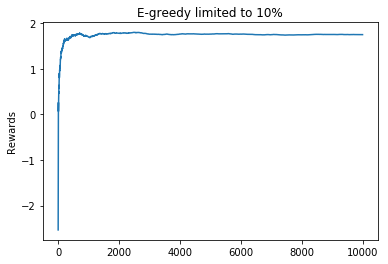

E greedy k - armed bandit
Final reward average 2.185906264334505


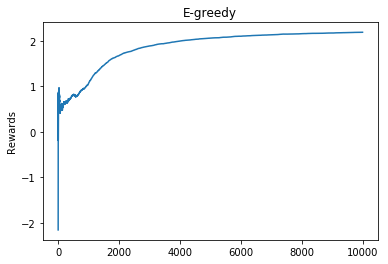

Optimistic k - armed bandit
Final reward average 1.7683427876318547


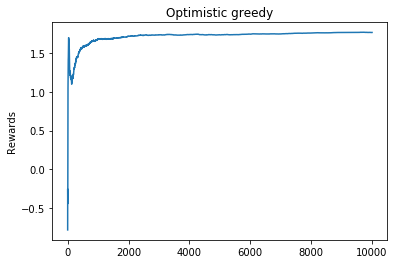

Upper confidente bound k - armed bandit


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


Final reward average 0.5447433233402751


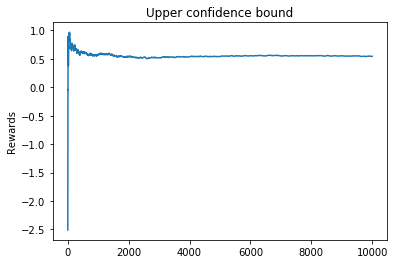

In [29]:
mean_list = [-1.8, -1, -0.2, 0.3, 0.8, 1, 1.5, 1.8, 2.3, 0.5]
iterations = 10000
alpha = 0.003
variance = 1
print("Normal k - armed bandit")
k_armed_bandit(mean_list, iterations, alpha, variance)
print("E greedy k - armed bandit")
egreedy_armed_bandit(mean_list, iterations, alpha, variance)
print("Optimistic k - armed bandit")
optimistic_greedy(mean_list, iterations, alpha, variance)
print("Upper confidente bound k - armed bandit")
upper_confidence_bound(mean_list, iterations, alpha, variance)

# Executing algorithms with variance of 2

Normal k - armed bandit
Final reward average 1.8795727534517683


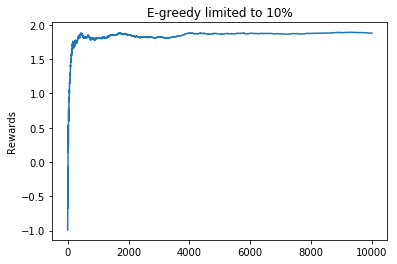

E greedy k - armed bandit
Final reward average 2.1812246349594244


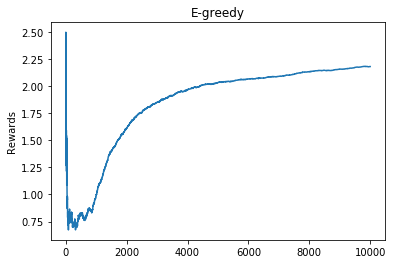

Optimistic k - armed bandit
Final reward average 2.3000215066212064


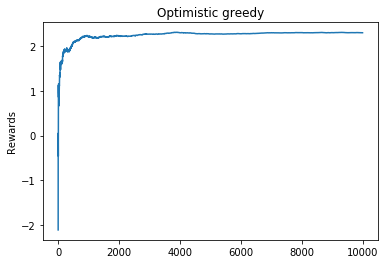

Upper confidente bound k - armed bandit


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


Final reward average 0.5405594918402062


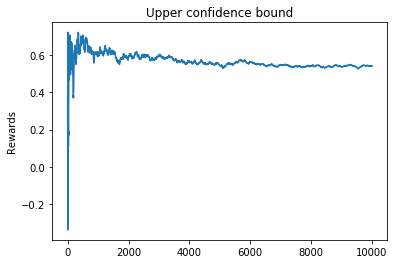

In [30]:
    mean_list = [-1.8, -1, -0.2, 0.3, 0.8, 1, 1.5, 1.8, 2.3, 0.5]
    iterations = 10000
    alpha = 0.003
    variance = 2
    print("Normal k - armed bandit")
    k_armed_bandit(mean_list, iterations, alpha, variance)
    print("E greedy k - armed bandit")
    egreedy_armed_bandit(mean_list, iterations, alpha, variance)
    print("Optimistic k - armed bandit")
    optimistic_greedy(mean_list, iterations, alpha, variance)
    print("Upper confidente bound k - armed bandit")
    upper_confidence_bound(mean_list, iterations, alpha, variance)

# Executing algoritms with two armed bandit
each arm will have a smaller probability of having a big reward

In [50]:
class Arm_2:
    def __init__(self, mean, variance, reward_prob):
        self.mean = mean
        self.variance = variance
        self.high_reward_prob = reward_prob

    def get_reward(self):
        if random.random() < self.high_reward_prob:
            return 20
        return np.random.normal(self.mean, self.variance, 1)

In [51]:
iterations = 20000

0.0002171906562156103 : 2.3
1.5930149202633133e-05 : 1.8
-4.7268027457887725e-05 : 0.8
-0.0025357683994617266 : -1.3
Final reward average [3.20682307]


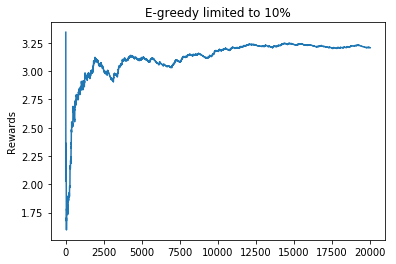

In [52]:
mean_list = [2.3, 1.8, 0.8, -1.3]
arms = [Arm_2(2.3, 1, 0), Arm_2(1.8, 1, 0.20), Arm_2(0.8, 1, 0.05), Arm_2(-1.3, 1, 0.05)]
n = 4
utilities = np.array([0.0] * n)
ns = np.array([0] * n)
epsilon = 0.1
epsilon_decay = 0.1
reward_list = []
reward_means = []
for i in range(iterations):
    if random.random() < epsilon:
        action = random.randint(0, n - 1)
    else:
        action = np.argmax(utilities) 
    reward = arms[action].get_reward()
    if ns[action] == 0:
        utilities[action] = reward
    ns[action] += 1
    utilities[action] = alpha * utilities[action] + (reward - utilities[action])/ns[action]
    reward_list.append(reward)
    reward_means.append(np.sum(reward_list) / len(reward_list))
for i in range(len(utilities)):
    print(utilities[i], ":", mean_list[i])
print("Final reward average", np.sum(reward_list) / len(reward_list))
plt.plot(reward_means)
plt.title('E-greedy limited to 10%')
plt.ylabel('Rewards')
plt.show()

0.0005191936579507785 : 2.3
0.0004500322372292238 : 1.8
0.0003323617808222113 : 0.8
-0.00011415256225701681 : -1.3
Final reward average [2.36038512]


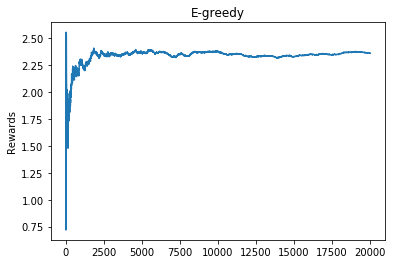

In [53]:
mean_list = [2.3, 1.8, 0.8, -1.3]
arms = [Arm_2(2.3, 1, 0), Arm_2(1.8, 1, 0.20), Arm_2(0.8, 1, 0.05), Arm_2(-1.3, 1, 0.05)]
n = 4
utilities = np.array([0.0] * n)
ns = np.array([0] * n)
epsilon = 0.9997
epsilon_decay = 0.4
reward_list = []
reward_means = []
for i in range(iterations):
    if random.random() < epsilon:
        action = random.randint(0, n-1)
    else:
        action = np.argmax(utilities) 
    reward = arms[action].get_reward()
    if ns[action] == 0:
        utilities[action] = reward
    ns[action] += 1
    utilities[action] = alpha * utilities[action] + (reward - utilities[action])/ns[action]
    epsilon = max(1 - (0.000001 * np.sum(i)), 0.00)
    reward_list.append(reward)
    reward_means.append(np.sum(reward_list) / len(reward_list))
for i in range(len(utilities)):
    print(utilities[i], ":", mean_list[i])
print("Final reward average", np.sum(reward_list) / len(reward_list))
plt.plot(reward_means)
plt.title('E-greedy')
plt.ylabel('Rewards')
plt.show()

3.717298450984717e-05 : 2.3
-0.4003458807701843 : 1.8
-0.5807837813137176 : 0.8
-0.3933126677978029 : -1.3
Final reward average 2.2948568339500746


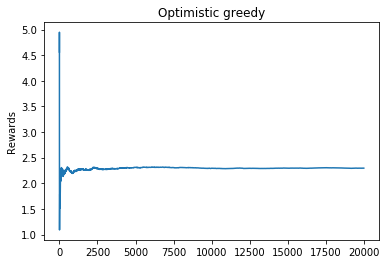

In [54]:
mean_list = [2.3, 1.8, 0.8, -1.3]
arms = [Arm_2(2.3, 1, 0), Arm_2(1.8, 1, 0.20), Arm_2(0.8, 1, 0.05), Arm_2(-1.3, 1, 0.05)]
n = 4
arms = generate_arms(n, mean_list, variance)
utilities = np.array([10.0] * n)
ns = np.array([0] * n)
epsilon = 0
reward_list = []
reward_means = []
for i in range(iterations):
    action = np.argmax(utilities)
    reward = arms[action].get_reward()
    if ns[action] == 0:
        utilities[action] = reward
    ns[action] += 1
    utilities[action] =  alpha * utilities[action] + (reward - utilities[action])/ns[action]
    reward_list.append(reward)
    reward_means.append(np.sum(reward_list) / len(reward_list))
for i in range(len(utilities)):
    print(utilities[i], ":", mean_list[i])
print("Final reward average", np.sum(reward_list)/ len(reward_list))
plt.plot(reward_means)
plt.title('Optimistic greedy')
plt.ylabel('Rewards')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


0.0006923703703022327 : 2.3
-0.0007472563961240423 : 1.8
-0.0009308595792850835 : 0.8
-0.0014662511689538533 : -1.3
Final reward average 0.9088045649776851


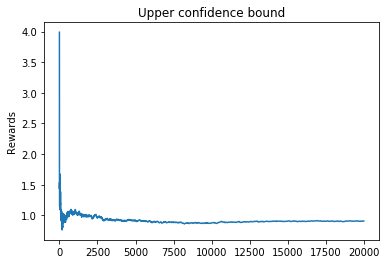

In [55]:
mean_list = [2.3, 1.8, 0.8, -1.3]
arms = [Arm_2(2.3, 1, 0), Arm_2(1.8, 1, 0.20), Arm_2(0.8, 1, 0.05), Arm_2(-1.3, 1, 0.05)]
n = 4
arms = generate_arms(n, mean_list , variance)
utilities = np.array([0.0] * n)
ns = np.array([0.0] * n)
epsilon = 0
c = 2
reward_list = []
reward_means = []
for i in range(iterations):
    ucb_utilities = np.copy(utilities)
    for j in range(len(ucb_utilities)):
        ucb_utilities[j] += c * math.sqrt(math.log(i + 1)/ns[j])
    action = np.argmax(ucb_utilities)
    reward = arms[action].get_reward()
    if ns[action] == 0:
        utilities[action] = reward
    ns[action] += 1
    utilities[action] =  alpha * utilities[action] + (reward - utilities[action])/ns[action]
    reward_list.append(reward)
    reward_means.append(np.sum(reward_list) / len(reward_list))
for i in range(len(utilities)):
    print(utilities[i], ":", mean_list[i])
print("Final reward average", np.sum(reward_list)/ len(reward_list))
plt.plot(reward_means)
plt.title('Upper confidence bound')
plt.ylabel('Rewards')
plt.show()